# Pandas For data Science: Creating Useful Plots

Based on Pandas Practices by Kevin Markham at PYCON CLEVELAND 2018

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading Datastes

   - Dataset 1: Rhode Island Dataset from [Stanford Open Policing Project](https://openpolicing.stanford.edu/)

In [2]:
ri = pd.read_csv('police.csv')
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Exercise 9: Do most stops occur at night?

___First Way___

In [3]:
# Create stop_datetime column concatenating stop_date and stop_time

combined = ri['stop_date'].str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

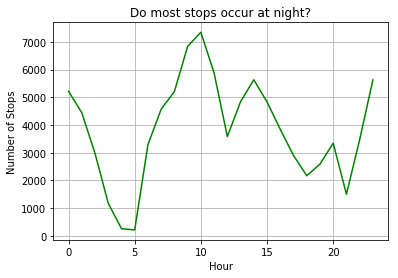

In [4]:
# No, the most stops occur at 10 AM

ri['stop_datetime'].dt.hour.value_counts().sort_index().plot(c='g')
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('Number of Stops')
plt.title('Do most stops occur at night?')
plt.show()

___Second Way___

In [5]:
ri['stop_datetime'].dt.hour.head()

0     1
1     8
2    23
3    17
4    10
Name: stop_datetime, dtype: int64

In [6]:
def daytime(x):
    if x > 6 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 18:
        return 'Afternoon'
    elif x >=18:
        return 'Evening'
    else:
        return 'Night'

In [7]:
# Function MAP to apply a function to a Series from my DataFrame

ri['stop_daytime'] = list(map(daytime,ri['stop_datetime'].dt.hour))

In [8]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime,stop_daytime
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-02 01:55:00,Night
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-18 08:15:00,Morning
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-01-23 23:15:00,Evening
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005-02-20 17:15:00,Afternoon
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005-03-14 10:00:00,Morning


In [9]:
ri['stop_daytime'].value_counts()

Morning      29847
Afternoon    25634
Evening      18696
Night        17564
Name: stop_daytime, dtype: int64

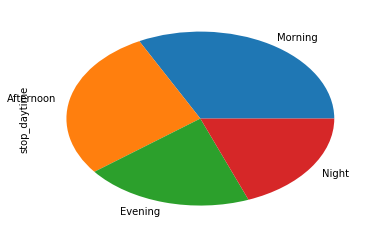

In [10]:
ri['stop_daytime'].value_counts().plot(kind= 'pie')